In [1]:
#IMPORTING ALL THE LIBRARY FOR PROCESSING OF TEXT DATA
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string  
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KATHIR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df=pd.read_csv(r"C:\Users\KATHIR\healthcare_reviews (1).csv")


In [3]:
df.head()

Review_Text  Rating
0        I have mixed feelings about my experience.        4
1  The staff was caring and attentive. I couldn't...       5
2        I have mixed feelings about my experience.        5
3        I have mixed feelings about my experience.        5
4  The healthcare provider was excellent. I had a...       3

In [4]:
#grouping the sentiments based on their rating
df.loc[df['Rating'] >3, 'Sentiment'] = '1'
df.loc[df['Rating'] ==3, 'Sentiment'] = '0'
df.loc[df['Rating'] <3, 'Sentiment'] = '-1'

In [5]:
df.isnull().sum()#checking the null values

Review_Text    100
Rating           0
Sentiment        0
dtype: int64

In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
 2   Sentiment    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [8]:
df=df.dropna()#Removing the null values in the Review_text


DATA PREPROCESSING

In [9]:
df['Review_Text']=df['Review_Text'].str.lower()# all the charcters to lower case

In [10]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)#tokenization


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KATHIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
english_stopwords = stopwords.words('english')
custom_words_to_retain = ['nor', 'not', "don't", ...]
def remove_stop_words(words_list):
    return [t for t in words_list if t not in english_stopwords or t in custom_words_to_retain]

In [13]:
df['stopwords_removed']=df.apply(lambda row:remove_stop_words(row['tokenized_reviews']),axis=1)


In [14]:
punctuations = string.punctuation
def remove_punct(words_list):
    return [t for t in words_list if t not in punctuations]

In [15]:
df['punct_removed']=df.apply(lambda row:remove_punct(row['stopwords_removed']),axis=1)

In [16]:
lm=WordNetLemmatizer()
def lemmatize_list(words_list):
    return [lm.lemmatize(t) for t in words_list]



In [17]:
df['lemmatized']=df.apply(lambda row:lemmatize_list(row['punct_removed']),axis=1)

In [18]:
def convert_to_string(words_list):
    return " ".join(words_list)

In [19]:
df['cleaned']=df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)

In [20]:
df.head()


Review_Text  Rating Sentiment  \
0        i have mixed feelings about my experience.        4         1   
1  the staff was caring and attentive. i couldn't...       5         1   
2        i have mixed feelings about my experience.        5         1   
3        i have mixed feelings about my experience.        5         1   
4  the healthcare provider was excellent. i had a...       3         0   

                                   tokenized_reviews  \
0  [i, have, mixed, feelings, about, my, experien...   
1  [the, staff, was, caring, and, attentive, ., i...   
2  [i, have, mixed, feelings, about, my, experien...   
3  [i, have, mixed, feelings, about, my, experien...   
4  [the, healthcare, provider, was, excellent, .,...   

                                   stopwords_removed  \
0                   [mixed, feelings, experience, .]   
1  [staff, caring, attentive, ., could, n't, happ...   
2                   [mixed, feelings, experience, .]   
3                   [mixed, feelings, experience, .]   
4  [healthcare, provider, excellent, ., great, ex...   

                                       punct_removed  \
0                      [mixed, feelings, experience]   
1    [staff, caring, attentive, could, n't, happier]   
2                      [mixed, feelings, experience]   
3                      [mixed, feelings, experience]   
4  [healthcare, provider, excellent, great, exper...   

                                          lemmatized  \
0                       [mixed, feeling, experience]   
1    [staff, caring, attentive, could, n't, happier]   
2                       [mixed, feeling, experience]   
3                       [mixed, feeling, experience]   
4  [healthcare, provider, excellent, great, exper...   

                                          cleaned  
0                        mixed feeling experience  
1        staff caring attentive could n't happier  
2                        mixed feeling experience  
3                        mixed feeling experience  
4  healthcare provider excellent great experience

In [21]:
df['Sentiment'].value_counts()

1     388
-1    365
0     147
Name: Sentiment, dtype: int64

Exploratory Data Analysis (EDA):

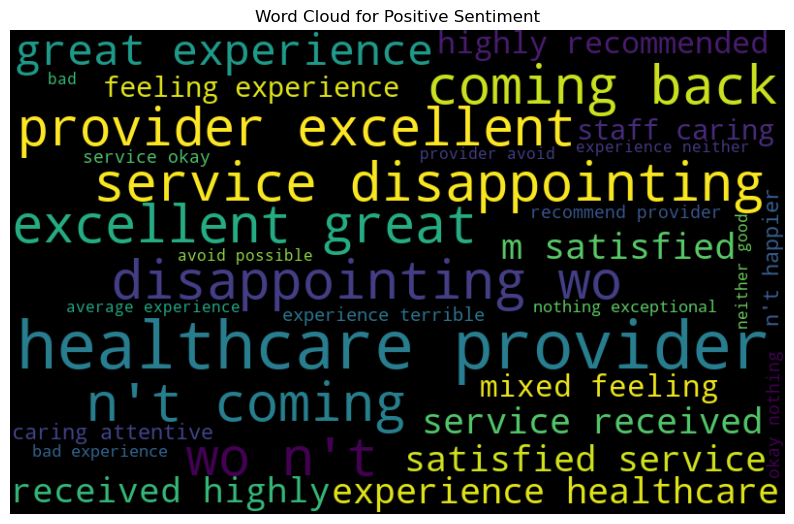

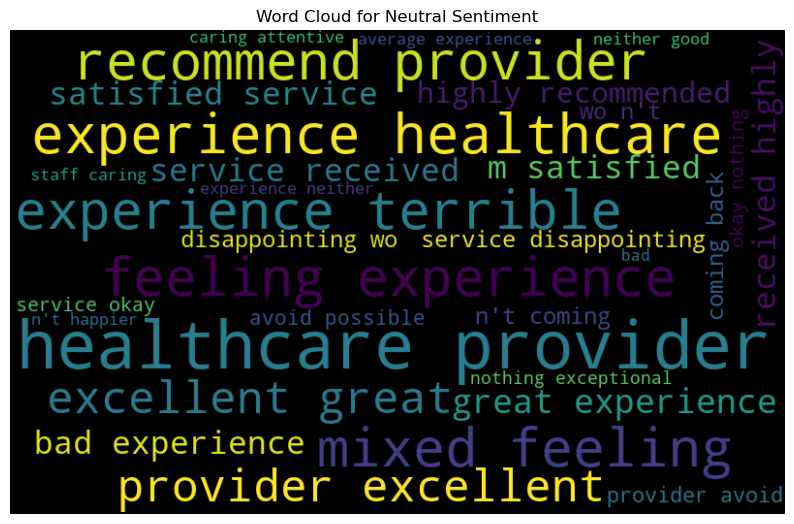

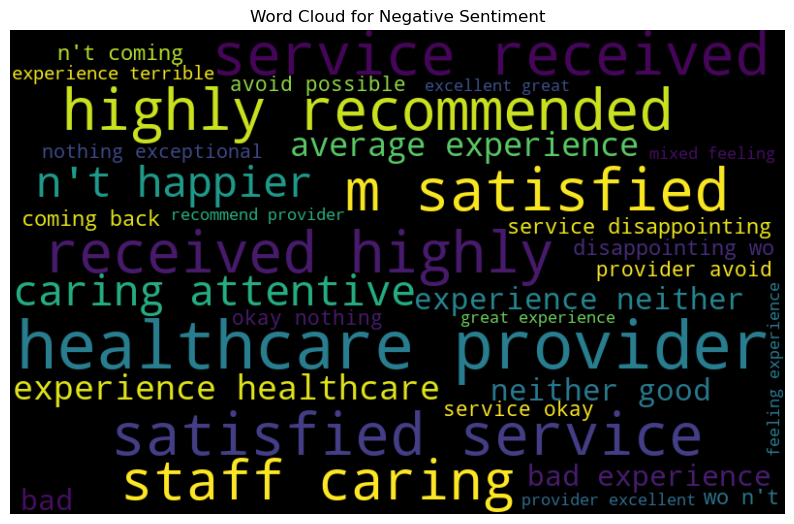

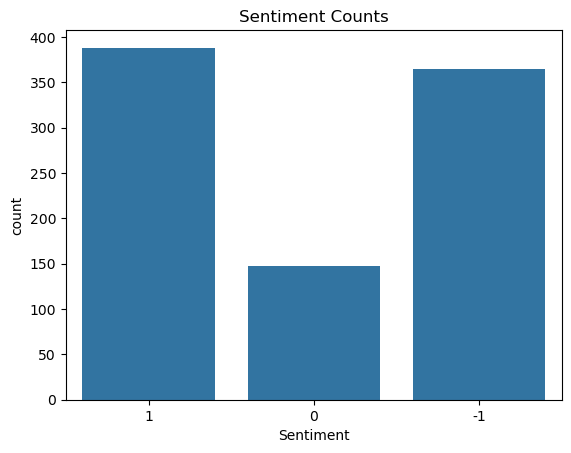

In [22]:
from wordcloud import WordCloud
# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['Sentiment']=='1']['cleaned'])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_text)

plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

# Generate word cloud for neutral sentiment
neutral_text = ' '.join(df[df['Sentiment']=='0']['cleaned'])
neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_text)

plt.figure(figsize=(10, 7))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

negative_text = ' '.join(df[df['Sentiment']=='-1']['cleaned'])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_text)

plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

# Bar plot of sentiment counts
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Counts')
plt.show()


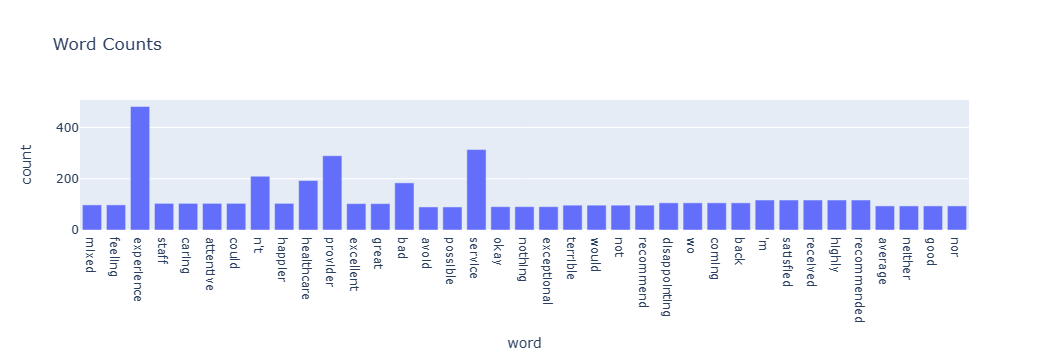

In [23]:
import plotly.express as px
from collections import Counter

# Assuming 'df' is your DataFrame and 'cleaned' column contains cleaned text
words = ' '.join(df['cleaned']).split()
word_counts = Counter(words)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['word', 'count']

fig = px.bar(word_counts_df, x='word', y='count', title='Word Counts')
fig.show()


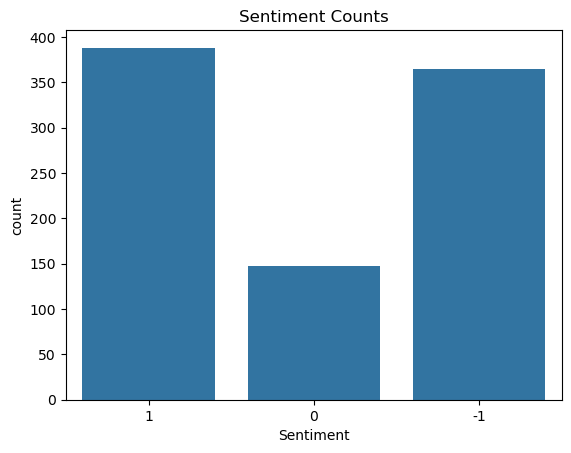

In [24]:
import seaborn as sns

# Bar plot of sentiment counts
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Counts')
plt.show()


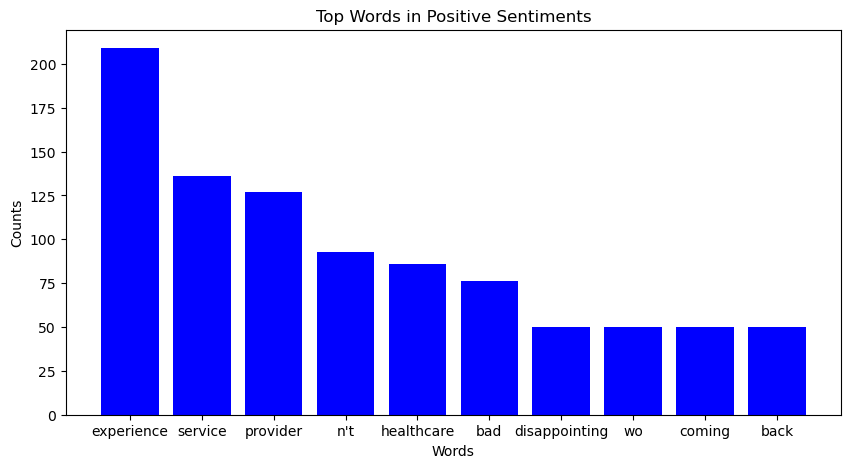

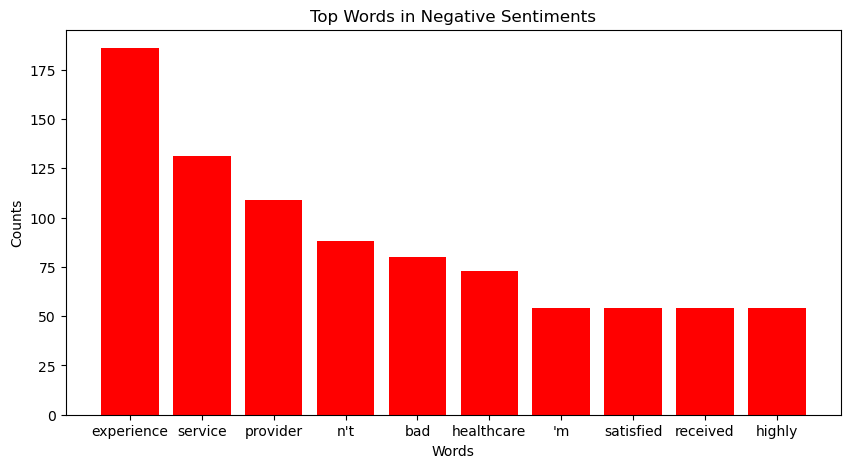

In [25]:
from collections import Counter

# Assuming 'cleaned' column contains cleaned reviews and 'Sentiment' column contains sentiment labels
positive_words = ' '.join(df[df['Sentiment']=='1']['cleaned']).split()
negative_words = ' '.join(df[df['Sentiment']=='-1']['cleaned']).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the 10 most common words in positive and negative sentiments
top_positive_words = positive_word_counts.most_common(10)
top_negative_words = negative_word_counts.most_common(10)

# Plot bar chart for top words in positive sentiments
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_positive_words), color='b')
plt.title('Top Words in Positive Sentiments')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

# Plot bar chart for top words in negative sentiments
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_negative_words), color='r')
plt.title('Top Words in Negative Sentiments')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()


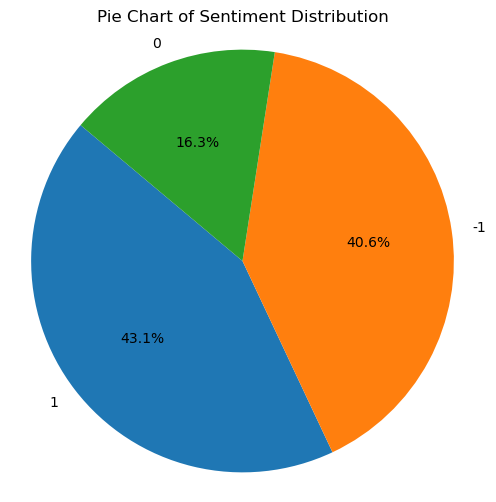

In [26]:
# Assuming 'Sentiment' column contains sentiment labels
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Sentiment Distribution')
plt.show()


In [27]:
sentiment_counts = df['Sentiment'].value_counts()

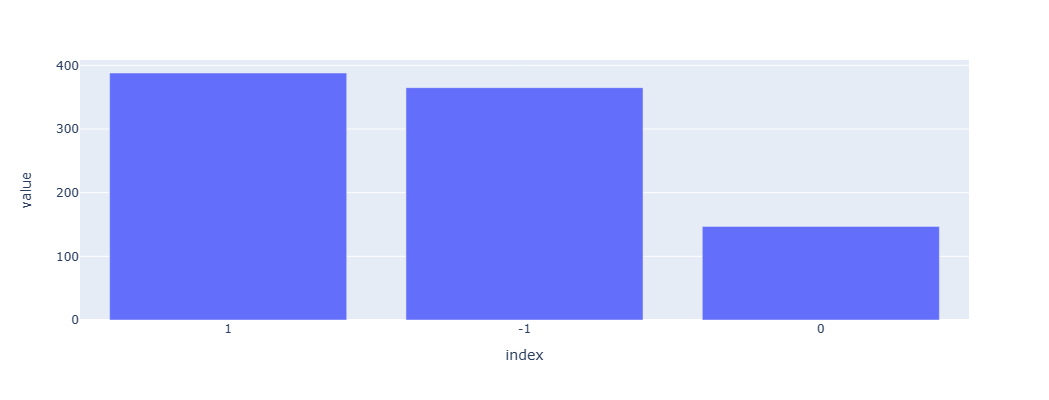

In [28]:

fig = px.bar(sentiment_counts,height=400,width=700)
fig.update_layout(showlegend=False)
fig.show()

In [29]:

cv = CountVectorizer(ngram_range=(1,2))
X = df['cleaned'].tolist()
X_cv = cv.fit_transform(X)
y=df['Sentiment'].values
dataset_analysis = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names_out())
dataset_analysis['Sentiment']=y
temp_df=dataset_analysis.query("Sentiment=='1'")
positive_df=pd.DataFrame()
positive_df['Words']=list(temp_df.iloc[:, :-1].columns)
positive_df['Frequency']=temp_df.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.to_csv(r'positive_df_1.csv',index=False)

In [30]:
positive_df.head()

Words  Frequency
20           experience        209
58              service        136
48             provider        127
32  healthcare provider         86
31           healthcare         86

In [31]:
positive_df[positive_df['Words'].str.split().apply(len) > 1]

Words  Frequency
32    healthcare provider         86
67              wo coming         50
16       disappointing wo         50
12            coming back         50
59  service disappointing         50
29       great experience         48
50     provider excellent         48
18        excellent great         48
52        received highly         46
34     highly recommended         46
57      satisfied service         46
61       service received         46
25     feeling experience         44
36          mixed feeling         44
1         attentive could         43
63           staff caring         43
10       caring attentive         43
14          could happier         43
23    experience terrible         41
65         terrible would         41
54     recommend provider         41
69              would not         41
42          not recommend         41
46           okay nothing         40
44    nothing exceptional         40
60           service okay         40
5          avoid possible         38
3      average experience         38
38           neither good         38
8          bad experience         38
40                nor bad         38
27               good nor         38
22     experience neither         38
49         provider avoid         38
21  experience healthcare         38

In [32]:
temp_df=dataset_analysis.query("Sentiment=='-1'")

In [33]:
negative_df=pd.DataFrame()
negative_df['Words']=list(temp_df.iloc[:, :-1].columns)
negative_df['Frequency']=temp_df.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.to_csv(r'negative_df_1.csv',index=False)

In [34]:

negative_df.head()

Words  Frequency
20  experience        186
58     service        131
48    provider        109
7          bad         80
31  healthcare         73

In [35]:
negative_df[negative_df['Words'].str.split().apply(len) > 1]

Words  Frequency
32    healthcare provider         73
34     highly recommended         54
61       service received         54
52        received highly         54
57      satisfied service         54
63           staff caring         48
1         attentive could         48
14          could happier         48
10       caring attentive         48
3      average experience         43
40                nor bad         43
38           neither good         43
27               good nor         43
22     experience neither         43
67              wo coming         40
16       disappointing wo         40
59  service disappointing         40
12            coming back         40
46           okay nothing         37
21  experience healthcare         37
5          avoid possible         37
49         provider avoid         37
44    nothing exceptional         37
60           service okay         37
8          bad experience         37
65         terrible would         36
69              would not         36
54     recommend provider         36
50     provider excellent         36
42          not recommend         36
29       great experience         36
23    experience terrible         36
18        excellent great         36
36          mixed feeling         34
25     feeling experience         34

In [36]:
temp_df=dataset_analysis.query("Sentiment=='0'")

In [37]:
neutral_df=pd.DataFrame()
neutral_df['Words']=list(temp_df.iloc[:, :-1].columns)
neutral_df['Frequency']=temp_df.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.to_csv(r'neutral_df_1.csv',index=False)

In [38]:
neutral_df.head()

Words  Frequency
20  experience        186
58     service        131
48    provider        109
7          bad         80
31  healthcare         73

In [39]:
neutral_df[neutral_df['Words'].str.split().apply(len) > 1]

Words  Frequency
32    healthcare provider         73
34     highly recommended         54
61       service received         54
52        received highly         54
57      satisfied service         54
10       caring attentive         48
14          could happier         48
1         attentive could         48
63           staff caring         48
22     experience neither         43
27               good nor         43
38           neither good         43
40                nor bad         43
3      average experience         43
12            coming back         40
59  service disappointing         40
16       disappointing wo         40
67              wo coming         40
8          bad experience         37
60           service okay         37
44    nothing exceptional         37
49         provider avoid         37
5          avoid possible         37
21  experience healthcare         37
46           okay nothing         37
42          not recommend         36
18        excellent great         36
23    experience terrible         36
29       great experience         36
50     provider excellent         36
54     recommend provider         36
69              would not         36
65         terrible would         36
36          mixed feeling         34
25     feeling experience         34


MODEL BUILDING:



In [40]:
X=df['cleaned'].values
y=df['Sentiment'].values

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)


In [42]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [43]:
print('X_train='+str(len(X_train)))
print('X_test='+str(len(X_test)))

X_train=675
X_test=225


In [44]:
print("y_train, counts of label '1': {}".format(np.count_nonzero(y_train == 1))) 
print("y_train, counts of label '-1': {}".format(np.count_nonzero(y_train == -1))) 
print("y_train, counts of label '0': {}".format(np.count_nonzero(y_train == 0))) 


y_train, counts of label '1': 290
y_train, counts of label '-1': 269
y_train, counts of label '0': 116


In [45]:
print("y_test, counts of label '1': {}".format(np.count_nonzero(y_test == 1))) 
print("y_test, counts of label '-1': {}".format(np.count_nonzero(y_test == -1))) 
print("y_test, counts of label '0': {}".format(np.count_nonzero(y_test == 0))) 

y_test, counts of label '1': 98
y_test, counts of label '-1': 96
y_test, counts of label '0': 31


In [46]:
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rando
                                                    m_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [48]:
y_pred=log_reg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[32  0 47]
 [ 8  0 17]
 [36  0 40]]
0.4


<Axes: >

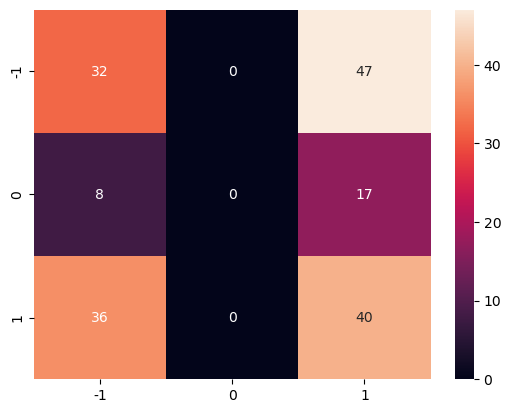

In [49]:
categories = ["-1", "0","1"]
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)

HERE THE VALUE OF NEUTRAL REVIEWS ARE LOW SO I USED ONE OF THE SAMPLING TECHNIQUE SMOTE

In [50]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy={'0': 388})  # Oversample the "0" class to have 388 samples
X_res, y_res = smote.fit_resample(X, y)

print(pd.Series(y_res).value_counts())


1     388
0     388
-1    365
Name: Sentiment, dtype: int64


RANDOM FOREST ALGORITHM:

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.38      0.25      0.30        76
           0       0.29      0.62      0.39        66
           1       0.32      0.14      0.19        87

    accuracy                           0.31       229
   macro avg       0.33      0.34      0.30       229
weighted avg       0.33      0.31      0.29       229



In [52]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[19 48  9]
 [ 9 41 16]
 [22 53 12]]
0.314410480349345


In [53]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_res, y_res)

# Print the best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [60]:
#HYPERPARAMETER TUNING
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.38      0.25      0.30        76
           0       0.31      0.74      0.44        66
           1       0.41      0.10      0.17        87

    accuracy                           0.34       229
   macro avg       0.37      0.37      0.30       229
weighted avg       0.37      0.34      0.29       229



In [55]:
from sklearn.model_selection import cross_val_score

# Create a new Random Forest Classifier with the best parameters
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Perform cross-validation
scores = cross_val_score(clf, X_res, y_res, cv=5)

# Print the cross-validation scores
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', scores.mean())


Cross-Validation Scores: [0.34934498 0.35526316 0.35526316 0.34649123 0.27631579]
Average Cross-Validation Score: 0.3365356622998545


SUPPORT VECTOR MACHINE ALGORITHM:

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the SMOTE-resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create a Support Vector Classifier
svc = SVC(kernel='linear')

# Train the model using the SMOTE-resampled data
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.38      0.25      0.30        76
           0       0.29      0.62      0.39        66
           1       0.32      0.14      0.19        87

    accuracy                           0.31       229
   macro avg       0.33      0.34      0.30       229
weighted avg       0.33      0.31      0.29       229



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Train the model using the SMOTE-resampled data
gb.fit(X_res, y_res)

# Make predictions
y_pred = gb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.44      0.46      0.45        76
           0       0.34      0.65      0.45        66
           1       0.41      0.10      0.17        87

    accuracy                           0.38       229
   macro avg       0.40      0.41      0.35       229
weighted avg       0.40      0.38      0.34       229



In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Define the parameter grid
param_grid = {
    'n_estimators': sp_randInt(50, 200),
    'max_depth': sp_randInt(2, 10),
    'min_samples_split': sp_randFloat(),
    'min_samples_leaf': sp_randFloat(),
    'learning_rate': sp_randFloat()
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV object to the data
random_search.fit(X_res, y_res)

# Print the best parameters
print(random_search.best_params_)


{'learning_rate': 0.034388521115218396, 'max_depth': 7, 'min_samples_leaf': 0.3910606075732408, 'min_samples_split': 0.18223608778806233, 'n_estimators': 181}


In [59]:
from sklearn.metrics import classification_report

# Create a new Gradient Boosting Classifier with the best parameters
gb = GradientBoostingClassifier(
    n_estimators=117,
    learning_rate=0.5487337893665861,
    max_depth=7,
    min_samples_split=0.9944574626108207,
    min_samples_leaf=0.44842414298624733,
    random_state=42
)

# Train the model using the SMOTE-resampled data
gb.fit(X_res, y_res)

# Make predictions
y_pred = gb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.41      0.53      0.46        76
           0       0.33      0.65      0.44        66
           1       0.00      0.00      0.00        87

    accuracy                           0.36       229
   macro avg       0.25      0.39      0.30       229
weighted avg       0.23      0.36      0.28       229



C:\Users\KATHIR\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\KATHIR\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\KATHIR\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Conclusion:
Here the data set is duplicated hence the accuracy of the model is not taken into account I have done data cleaning and data preprocession of these nlp model